In [1]:
from parsing import *
from NJ import *

In [2]:
distance_matrix, gap_cost = parse_matrix_and_gap("testdata/example_slide4.phy")

Merging: (B:0.13,D:0.04)
Merging: (C:0.045,E:0.065)


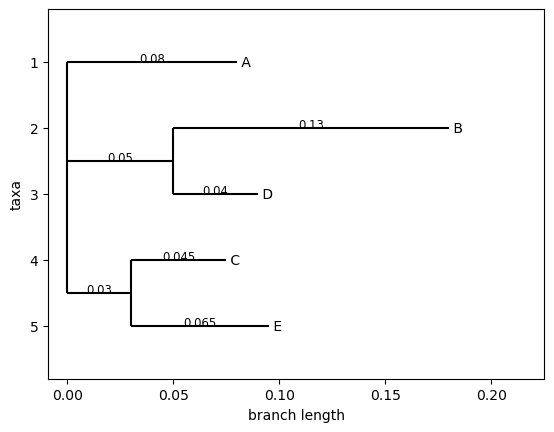

In [3]:
phy_file = "testdata/example_slide4.phy"
outputfile  = "output/slide4.nwk"
tree = NJ(phy_file,outputfile)
print_tree(outputfile)
